# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">01 - Preprocessing - Merging & Cleaning 2019 Data</span>      
----

### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

Source data can be found at http://www.ercot.com/gridinfo/generation

In [2]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2019.xlsx', sheet_name = None)

In [3]:
df.keys()

dict_keys(['data_Summary_1', 'data_Summary_2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## 2. Clean the data

#### Remove non-month keys from the dictionary

In [4]:
del df['data_Summary_1']
del df['data_Summary_2']

#### Combine all the sheets into one dataframe

In [5]:
cdf = pd.concat(df,sort=False)

In [6]:
cdf.head()

Date     Fuel Settlement Type          Total         0:15  \
Jan 0 2019-01-01  Biomass           FINAL    1148.314991    12.251185   
    1 2019-01-01     Coal           FINAL  235545.419526  1529.104760   
    2 2019-01-01      Gas           FINAL   40782.739610   180.606435   
    3 2019-01-01   Gas-CC           FINAL  434870.957653  2947.595603   
    4 2019-01-01    Hydro           FINAL    4895.269472    46.366324   

              0:30         0:45         1:00         1:15         1:30  ...  \
Jan 0    12.245844    12.254418    12.247587    12.245620    12.246815  ...   
    1  1520.332865  1535.747438  1586.027458  1605.810590  1592.552870  ...   
    2   160.349899   146.806353   146.523069   144.740479   146.031641  ...   
    3  2948.503084  3014.702034  3014.588329  2963.793616  2978.654803  ...   
    4    46.923468    46.857019    46.748030    46.666752    46.689299  ...   

             22:45        23:00        23:15        23:30        23:45  \
Jan 0    12.010960    12.019123    12.028076    12.025374    12.021215   
    1  3047.460355  3016.801215  2968.742327  2930.632334  2887.075314   
    2   520.564340   520.896623   521.058603   519.846300   522.355563   
    3  5302.971344  5212.970521  5128.369400  5064.374276  5019.551849   
    4    39.731627    39.774781    39.866246    39.790408    39.923240   

              0:00  01:15 (DST)  01:30 (DST)  01:45 (DST)  02:00 (DST)  
Jan 0    12.006403          NaN          NaN          NaN          NaN  
    1  2858.106140          NaN          NaN          NaN          NaN  
    2   525.082782          NaN          NaN          NaN          NaN  
    3  4976.967618          NaN          NaN          NaN          NaN  
    4    40.091729          NaN          NaN          NaN          NaN  

[5 rows x 104 columns]

#### Select only the date, fuel type, and total electricity generated by fuel type for that day as new dataframe


In [7]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [8]:
full_df.head()

Date     Fuel          Total
Jan 0 2019-01-01  Biomass    1148.314991
    1 2019-01-01     Coal  235545.419526
    2 2019-01-01      Gas   40782.739610
    3 2019-01-01   Gas-CC  434870.957653
    4 2019-01-01    Hydro    4895.269472

#### Transpose the data such that the energy sources are columns and every row is a unique day throughout the year

In [9]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

#### Because we lost the data columns while transposing, create a new daily date column and set it as the index

In [10]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2019-01-01', periods=len(full_df), freq='D')

In [11]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,1148.314991,235545.419526,40782.739610,434870.957653,4895.269472,93428.357022,53.641722,1485.935487,176177.511908,2019-01-01
1,1162.203080,277037.062665,91733.692448,617336.121460,5811.108914,93426.929304,55.992074,1026.608335,44647.092789,2019-01-02
2,1162.613999,245775.354898,61966.045772,573644.233637,6837.828552,93522.637484,31.195408,9382.768256,112757.167848,2019-01-03
3,1179.698363,198852.627671,52866.562216,535138.592004,6657.928108,93427.506416,42.907599,10825.450374,118378.826967,2019-01-04
4,1136.227615,185398.002431,31988.940616,401680.279842,6520.970604,93425.248697,36.684742,9823.237250,175650.003890,2019-01-05


#### Now, let's set our newly created 'date' column as our index

In [12]:
full_df = full_df.set_index('date')

In [13]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2019-01-01,1148.314991,235545.419526,40782.739610,434870.957653,4895.269472,93428.357022,53.641722,1485.935487,176177.511908
2019-01-02,1162.203080,277037.062665,91733.692448,617336.121460,5811.108914,93426.929304,55.992074,1026.608335,44647.092789
2019-01-03,1162.613999,245775.354898,61966.045772,573644.233637,6837.828552,93522.637484,31.195408,9382.768256,112757.167848
2019-01-04,1179.698363,198852.627671,52866.562216,535138.592004,6657.928108,93427.506416,42.907599,10825.450374,118378.826967
2019-01-05,1136.227615,185398.002431,31988.940616,401680.279842,6520.970604,93425.248697,36.684742,9823.237250,175650.003890


#### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [14]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

## 3. Visualize the Data

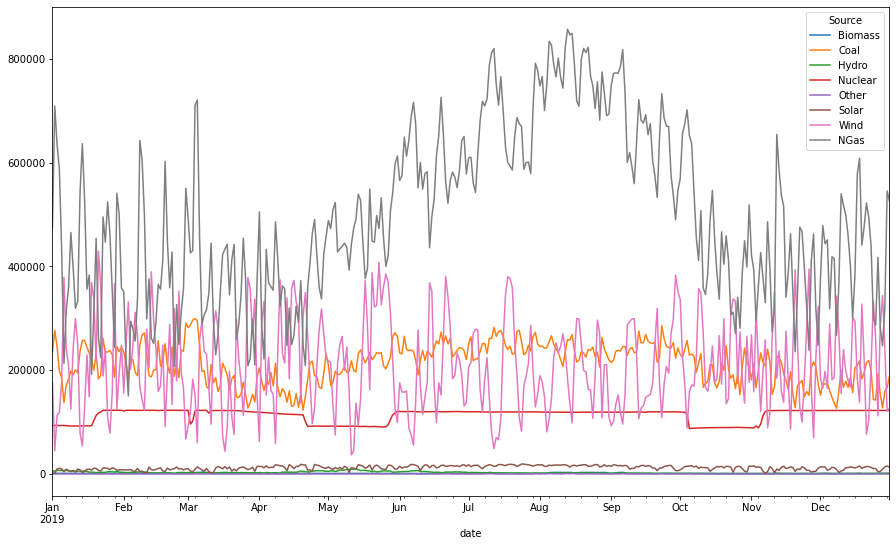

In [15]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


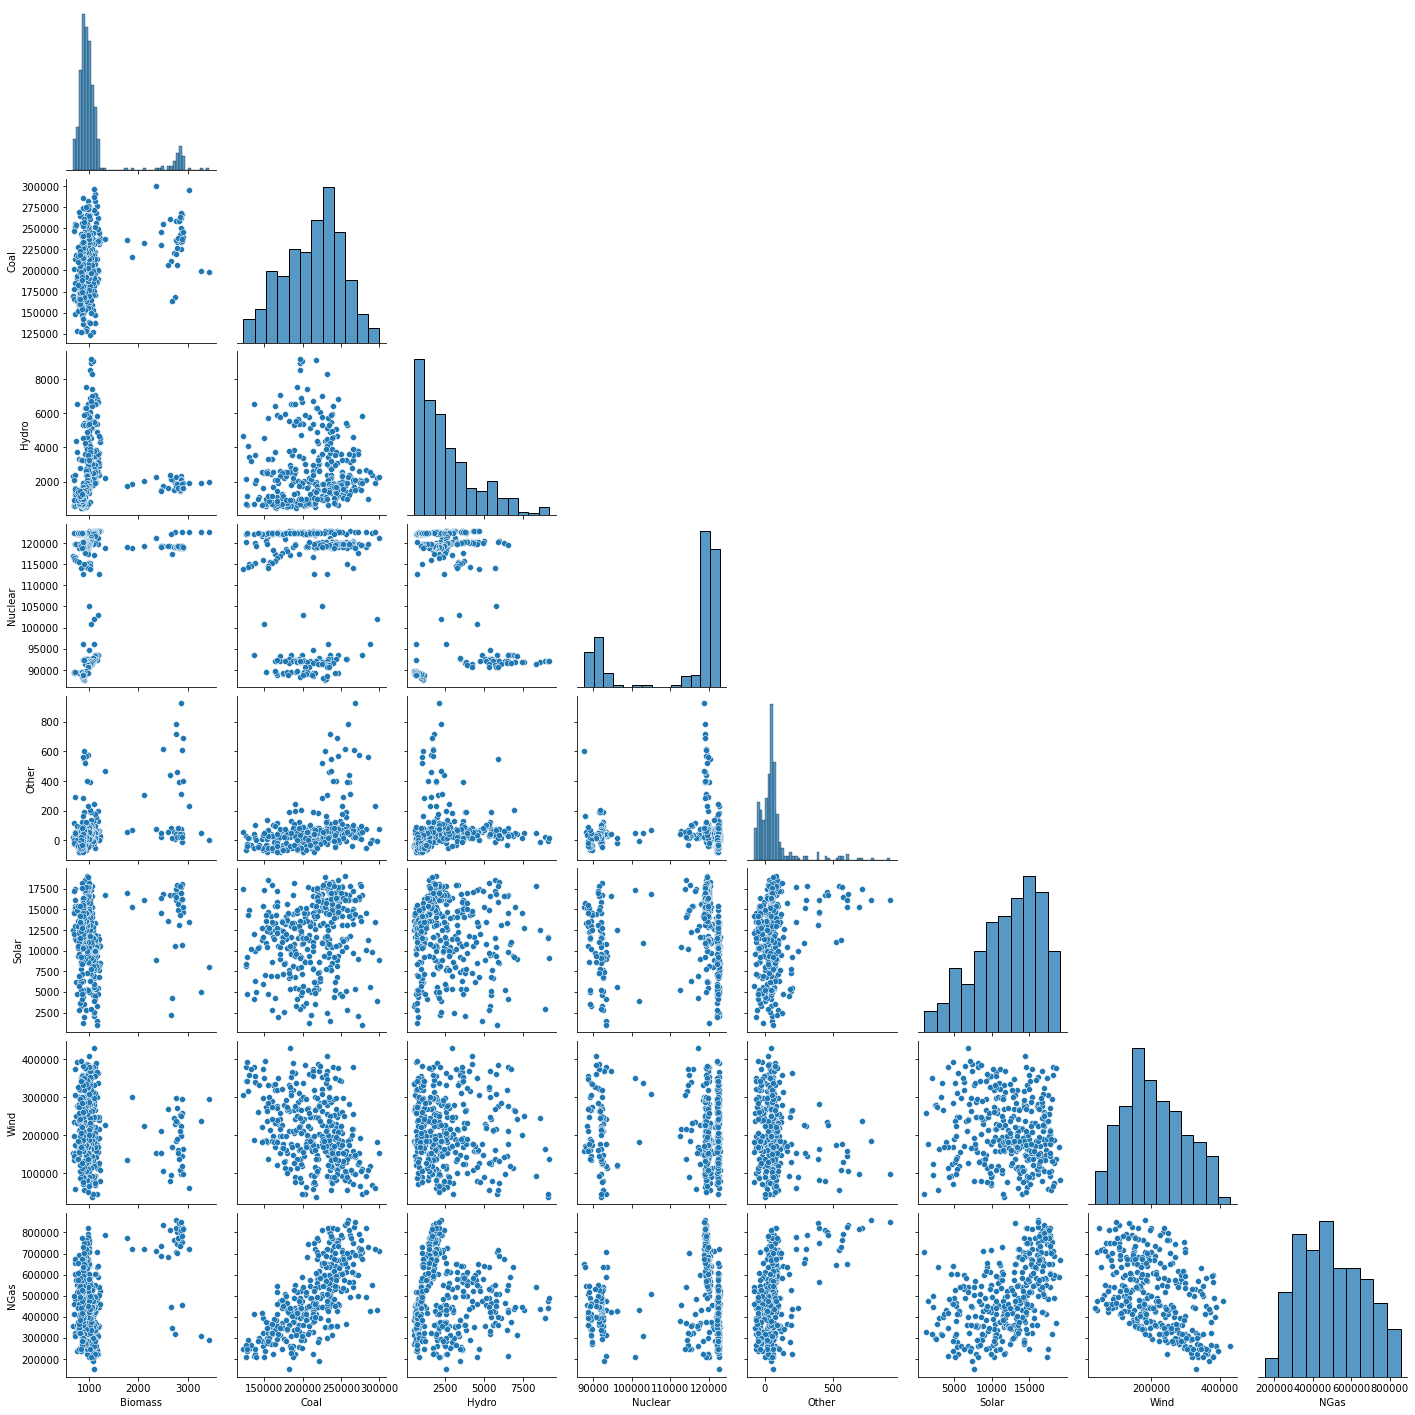

In [16]:
sns.pairplot(full_df, corner=True)

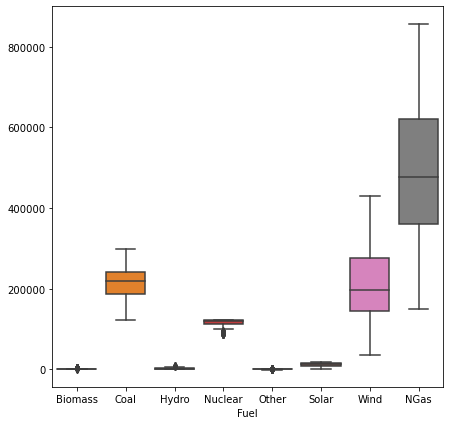

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot(data = full_df,
            
            );


#### Similar trends can be observed in the fuel mix as in 2018, with solar beginning to have an increased (albeit small) presence in the mix

### Export the cleaned data

In [18]:
full_df.to_csv('../../data/final_dfs/2019_clean.csv')